##### Start here if...
You're new to data science and machine learning, or looking for a simple intro to the Kaggle prediction competitions.

##### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

##### Practice Skills
Binary classification
Python and R basics

### Overview
#### The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary
Variable	Definition	        Key<br>
survival	Survival	        0 = No, 1 = Yes<br>
pclass	    Ticket class	    1 = 1st, 2 = 2nd, 3 = 3rd<br>
sex	        Sex<br>
Age	        Age in years<br>
sibsp	    # of siblings / spouses aboard the Titanic<br>
parch	    # of parents / children aboard the Titanic<br>
ticket	    Ticket number<br>
fare	    Passenger fare<br>
cabin	    Cabin number<br>
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

### sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

### parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [610]:
#load data
import pandas as pd

titanic_data = pd.read_csv("./all/train.csv")

In [611]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [612]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [613]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a315d9668>,
      dtype=object)

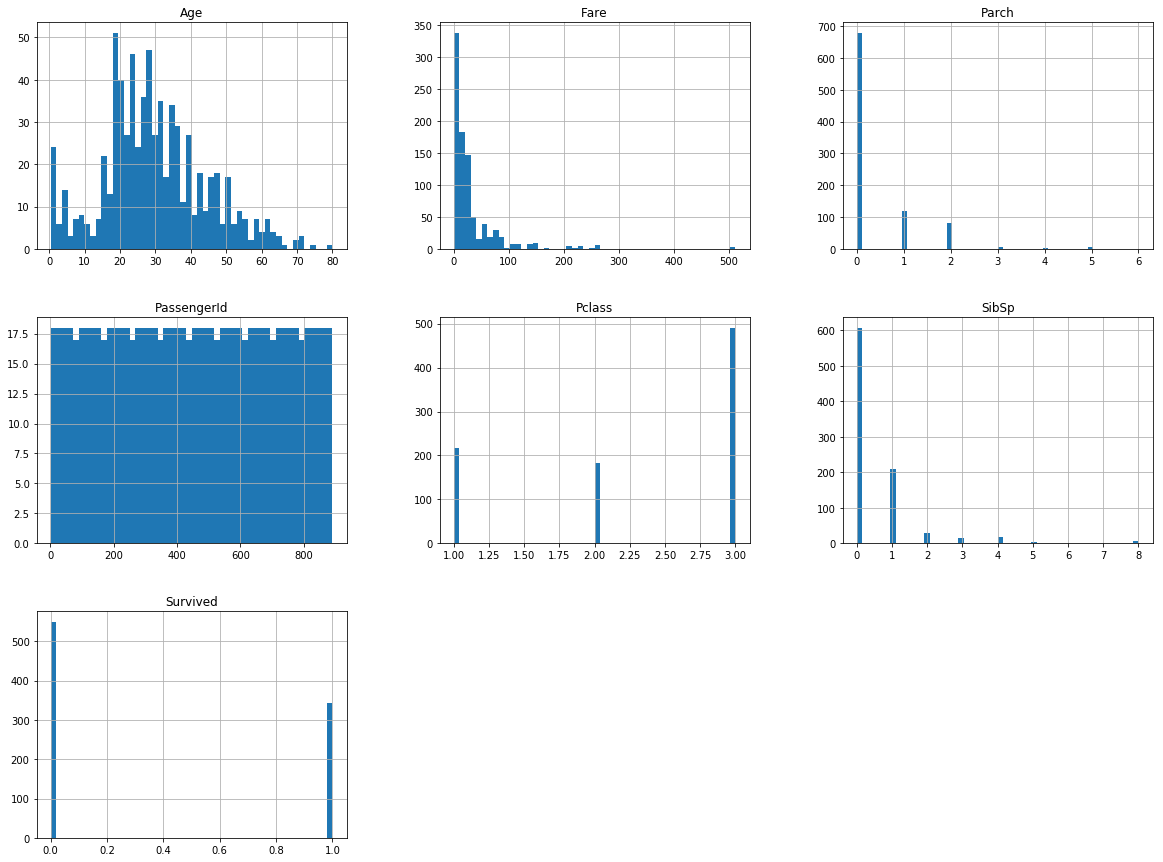

In [614]:
import matplotlib.pyplot as plt
titanic_data.hist(bins=50, figsize=(20,15))


In [615]:
titanic_data = titanic_data.dropna(subset=["Age"])

In [616]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic_sex = titanic_data[["Sex"]]
titanic_sex_encoded = encoder.fit_transform(titanic_sex)
#0 = female and 1 = male
titanic_data[["Sex"]] = titanic_sex_encoded

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [617]:
import numpy as np
np.random.seed(42)

from sklearn.utils import shuffle
titanic_data = shuffle(titanic_data)


y_train = titanic_data["Survived"]
X_train = titanic_data[["Pclass", "Sex", "Age","SibSp", "Parch"]]

In [618]:
# from sklearn.model_selection import train_test_split
# #split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

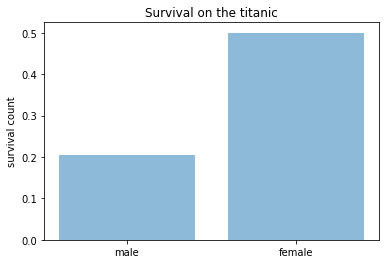

Percentage of men that survived: 0.2052980132450331
Percentage of women that survived: 0.5


In [619]:
import matplotlib.pyplot as plt

gender_surv = X_train.copy()
# print(gender_surv)
gender_surv["Survival"] = y_train
# print(gender_surv)
lived_male = gender_surv[(gender_surv.Survival == 1) & (gender_surv.Sex == 1)]
died_male = gender_surv[(gender_surv.Survival == 0) & (gender_surv.Sex == 1)]
lived_female = gender_surv[(gender_surv.Survival == 0) & (gender_surv.Sex == 0)]
died_female = gender_surv[(gender_surv.Survival == 0) & (gender_surv.Sex == 0)]

lived_male_count = lived_male.shape[0]
died_male_count = died_male.shape[0]
lived_female_count = lived_female.shape[0]
died_female_count = died_female.shape[0]
male_surv_rate = lived_male_count/(lived_male_count + died_male_count)
female_surv_rate = lived_female_count/(lived_female_count + died_female_count)
objects = ("male", "female")
y_pos = np.arange(len(objects))
survival_performance = [male_surv_rate, female_surv_rate]
 
plt.bar(y_pos, survival_performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('survival count')
plt.title('Survival on the titanic') 
plt.show()
print("Percentage of men that survived: {}".format(male_surv_rate))
print("Percentage of women that survived: {}".format(female_surv_rate))

### Spectulation about sex and survival
This shows a strong correlation between sex and survival as there is a significant amount of girls that survived the titanice over boys

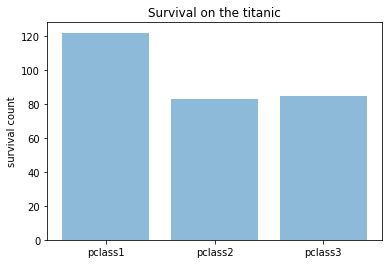

Percentage of rich that survived: 0.6559139784946236
Percentage of middle that survived: 0.4797687861271676
Percentage of poor that survived: 0.23943661971830985


In [620]:
X_survived_pclass1 = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Pclass == 1)]
X_died_pclass1 = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Pclass == 1)]
X_survived_pclass2 = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Pclass == 2)]
X_died_pclass2 = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Pclass == 2)]
X_survived_pclass3 = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Pclass == 3)]
X_died_pclass3 = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Pclass == 3)]
objects = ("pclass1", "pclass2", "pclass3")
y_pos = np.arange(len(objects))
survival_performance = [X_survived_pclass1.shape[0], X_survived_pclass2.shape[0], X_survived_pclass3.shape[0]]
 
plt.bar(y_pos, survival_performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('survival count')
plt.title('Survival on the titanic') 
plt.show()

print("Percentage of rich that survived: {}".format(X_survived_pclass1.shape[0]/(X_survived_pclass1.shape[0] + X_died_pclass1.shape[0])))
print("Percentage of middle that survived: {}".format(X_survived_pclass2.shape[0]/(X_survived_pclass2.shape[0] + X_died_pclass2.shape[0])))
print("Percentage of poor that survived: {}".format(X_survived_pclass3.shape[0]/(X_survived_pclass3.shape[0] + X_died_pclass3.shape[0])))

### Speculation about class and survival
This shows that survival rate did matter on how much money you had

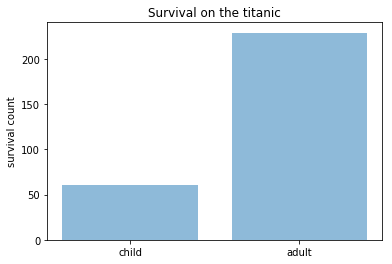

Percentage of kids that survived: 0.5398230088495575
Percentage of adults that survived: 0.3810316139767055


In [621]:
X_survived_child = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Age < 18)]
X_died_child = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Age < 18)]
X_survived_adult = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Age >= 18)]
X_died_adult = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Age >= 18)]
objects = ("child", "adult")
y_pos = np.arange(len(objects))
survival_performance = [X_survived_child.shape[0], X_survived_adult.shape[0]]
 
plt.bar(y_pos, survival_performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('survival count')
plt.title('Survival on the titanic') 
plt.show()

print("Percentage of kids that survived: {}".format(X_survived_child.shape[0]/(X_survived_child.shape[0] + X_died_child.shape[0])))
print("Percentage of adults that survived: {}".format(X_survived_adult.shape[0]/(X_survived_adult.shape[0] + X_died_adult.shape[0])))

### Speculation about age and survival
It seems that the younger you are the more likely that you survived

In [622]:
#scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)

In [623]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier()
sgd_clf.fit(X_scaled_train, y_train)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_scaled_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


print(confusion_matrix(y_train,y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

[[351  73]
 [126 164]]
0.6919831223628692
0.5655172413793104
0.6223908918406071


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

In [624]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_scaled_train, y_train)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dt_clf, X_scaled_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix, precision_score, recall_score


print(confusion_matrix(y_train,y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

[[354  70]
 [ 90 200]]
0.7407407407407407
0.6896551724137931
0.7142857142857143


In [625]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(X_scaled_train, y_train)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_scaled_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix, precision_score, recall_score


print(confusion_matrix(y_train,y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}



[[364  60]
 [ 78 212]]
0.7794117647058824
0.7310344827586207
0.7544483985765125


[[287  50]
 [ 60 174]]
0.7767857142857143
0.7435897435897436
0.759825327510917

In [626]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


clf = SVC()
clf.fit(X_scaled_train, y_train)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_scaled_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix, precision_score, recall_score


print(confusion_matrix(y_train,y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))


Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)


clf = grid_search.best_estimator_
clf.fit(X_scaled_train, y_train)
y_train_pred = cross_val_predict(clf, X_scaled_train, y_train, cv=3)
print(confusion_matrix(y_train,y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

[[390  34]
 [ 97 193]]
0.8502202643171806
0.6655172413793103
0.7466150870406189
[[393  31]
 [ 99 191]]
0.8603603603603603
0.6586206896551724
0.74609375


In [627]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier()
clf.fit(X_scaled_train, y_train)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_scaled_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix, precision_score, recall_score


print(confusion_matrix(y_train,y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_scaled_train, y_train)

knn_clf = grid_search.best_estimator_
knn_clf.fit(X_scaled_train, y_train)
y_train_pred = cross_val_predict(knn_clf, X_scaled_train, y_train, cv=3)
print(confusion_matrix(y_train,y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

[[369  55]
 [ 77 213]]
0.7947761194029851
0.7344827586206897
0.7634408602150538
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.7272727272727273, total=   0.0s
[CV]  n_neighbors=3, weights=uniform, score=0.8041958041958042, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.7972027972027972, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.8601398601398601, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance ..............

[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [628]:
knn = grid_search.best_estimator_

In [629]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [630]:
titanic_test = pd.read_csv("./all/test.csv")

In [631]:
titanic_test.head()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [632]:
median = titanic_test[["Age"]].median()
titanic_test[["Age"]] = titanic_test[["Age"]].fillna(median)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic_sex_test = titanic_test[["Sex"]]
titanic_sex_encoded_test = encoder.fit_transform(titanic_sex_test)
#0 = female and 1 = male
titanic_test[["Sex"]] = titanic_sex_encoded_test
X_test = titanic_test.copy()
X_test = X_test[["Pclass", "Sex", "Age","SibSp", "Parch"]]
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [633]:
y_test_pred = knn_clf.predict(X_test)
print(y_test_pred.shape)
columns = {'PassengerId': titanic_test["PassengerId"].values, 'Survived': y_test_pred}
print(y_test_pred.shape)
print(titanic_test["PassengerId"].shape)
answer = pd.DataFrame(columns)
answer.to_csv("./all/titanic_answers.csv", index=False)

(418,)
(418,)
(418,)


### Best answer is 63 percent accurate